In [43]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from plotDecBoundaries import plotDecBoundaries

In [44]:
#Reading data and storing the data
df1= pd.read_csv('/Users/shivanshamattya/Desktop/EE559/HW PDF/HW1_datasets/dataset1_train.csv',header=None) 
df2= pd.read_csv('/Users/shivanshamattya/Desktop/EE559/HW PDF/HW1_datasets/dataset2_train.csv',header=None) 
df3= pd.read_csv('/Users/shivanshamattya/Desktop/EE559/HW PDF/HW1_datasets/dataset3_train.csv',header=None) 
df4= pd.read_csv('/Users/shivanshamattya/Desktop/EE559/HW PDF/HW1_datasets/dataset1_test.csv',header=None)
df5= pd.read_csv('/Users/shivanshamattya/Desktop/EE559/HW PDF/HW1_datasets/dataset2_test.csv',header=None)
df6= pd.read_csv('/Users/shivanshamattya/Desktop/EE559/HW PDF/HW1_datasets/dataset3_test.csv',header=None)

In [45]:

np_array1 = df1.values
np_array2 = df2.values
np_array3 = df3.values
np_array4 = df4.values
np_array5 = df5.values
np_array6 = df6.values

In [46]:
#Code to implement a 2-class Nearest-Means Classifier for data that has 2 features

#Finding the mean of different classes
def find_mean(X,y):
    arr=np.column_stack((X,y))
    c1=arr[np.where(arr[:,2]==1.0)] 
    c2=arr[np.where(arr[:,2]==2.0)]
    
    m1f1=c1[:,0].mean()
    m1f2=c1[:,1].mean()
    m2f1=c2[:,0].mean()
    m2f2=c2[:,1].mean()
    
    mean=np.array([[m1f1,m1f2],[m2f1,m2f2]])
    return mean

#Caluculating the errror rate for trainng-dataset
def error_train(a15):
    c1=a15[np.where(a15[:,2]==1.0)] 
    c2=a15[np.where(a15[:,2]==2.0)]
    c1=c1[:,:2]
    c2=c2[:,:2]
    
    mu1 = np.mean(c1 , axis=0)
    mu2 = np.mean(c2, axis=0)
    w_nm = np.ones(3)
    w_nm[0] = 0.5 * (np.dot(mu2, mu2) - np.dot(mu1, mu1))
    w_nm[1:] = mu1-mu2
    for i, w in enumerate([w_nm]):
                    g1 = c1 @ w[1:] + w[0] ## discriminate function values for all data in class 1
                    g2 = c2 @ w[1:] + w[0] ## discriminate function values for all data in class 2
                    N1_errors = np.sum(g1 < 0)  ## error condition:  g > 0 <==> x in Gamma_1
                    N2_errors = np.sum(g2 >= 0) ## error condition:  g <= 0 <==> x in Gamma_2
                    error_rate = (N1_errors + N2_errors) / 100
    return error_rate*100,mu1,mu2

#Caluculating the errror rate for test-dataset
def error_test(a,p,q):
    c1=a[np.where(a[:,2]==1.0)] 
    c2=a[np.where(a[:,2]==2.0)]
    c1=c1[:,:2]
    c2=c2[:,:2]
    w_nm = np.ones(3)
    w_nm[0] = 0.5 * (np.dot(q,q) - np.dot(p,p))
    w_nm[1:] = p-q
    for i, w in enumerate([w_nm]):
                    g1 = c1 @ w[1:] + w[0] ## discriminate function values for all data in class 1
                    g2 = c2 @ w[1:] + w[0] ## discriminate function values for all data in class 2
                    N1_errors = np.sum(g1 < 0)  ## error condition:  g > 0 <==> x in Gamma_1
                    N2_errors = np.sum(g2 >= 0) ## error condition:  g <= 0 <==> x in Gamma_2
                    error_rate = (N1_errors + N2_errors) / 100
    return error_rate*100

#Caluculating the errror rate for Standardize
def error_std_1(a):
    c1=a[np.where(a[:,2]==1.0)] 
    c2=a[np.where(a[:,2]==2.0)]
    c1=c1[:,:2]
    c2=c2[:,:2]   
    mu1 = np.mean(c1 , axis=0)
    mu2 = np.mean(c2, axis=0)
    w_nm = np.ones(3)
    w_nm[0] = 0.5 * (np.dot(mu2,mu2) - np.dot(mu1,mu1))
    w_nm[1:] = mu1-mu2
    for i, w in enumerate([w_nm]):
                    g1 = c1 @ w[1:] + w[0] ## discriminate function values for all data in class 1
                    g2 = c2 @ w[1:] + w[0] ## discriminate function values for all data in class 2
                    N1_errors = np.sum(g1 < 0)  ## error condition:  g > 0 <==> x in Gamma_1
                    N2_errors = np.sum(g2 >= 0) ## error condition:  g <= 0 <==> x in Gamma_2
                    error_rate = (N1_errors + N2_errors) / 100
    return error_rate*100,mu1,mu2

def error_std_2(a,p,q):
    c1=a[np.where(a[:,2]==1.0)] 
    c2=a[np.where(a[:,2]==2.0)]
    c1=c1[:,:2]
    c2=c2[:,:2]
    w_nm = np.ones(3)
    w_nm[0] = 0.5 * (np.dot(q,q) - np.dot(p,p))
    w_nm[1:] = p-q
    for i, w in enumerate([w_nm]):
                    g1 = c1 @ w[1:] + w[0] ## discriminate function values for all data in class 1
                    g2 = c2 @ w[1:] + w[0] ## discriminate function values for all data in class 2
                    N1_errors = np.sum(g1 < 0)  ## error condition:  g > 0 <==> x in Gamma_1
                    N2_errors = np.sum(g2 >= 0) ## error condition:  g <= 0 <==> x in Gamma_2
                    error_rate = (N1_errors + N2_errors) / 100
    return error_rate*100

#Normalizing 
#Standardizing the training-Datasets
def data_standardized(z):
    m1=z[:,0].mean()
    s1=z[:,0].std()
    m2=z[:,1].mean()
    s2=z[:,1].std()
    Xst=[]
    for x,y in z:
        xst=(x-m1)/s1
        yst=(y-m2)/s2
        Xst.append([xst,yst])
    return np.array(Xst),np.array([[m1,m2],[s1,s2]])

#Standardizing the test-Datasets
def data_standardized_test(z,p):
    
    return (z-p[0])/p[1]


# def projection(x,rm):
# - 40 meann calucate 
# - for call x1x2 x3 zip 
# -mean cal function
# - error rate
#3 coulm -2 fwaturw
#else 1 feature



    
    

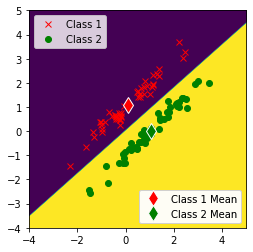

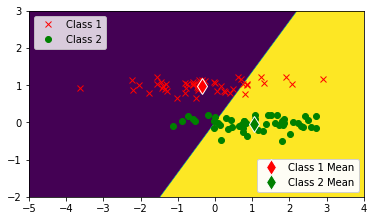

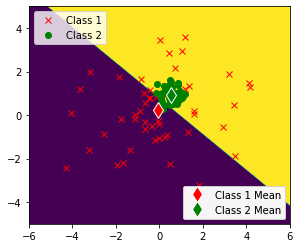

In [47]:
#Get training data for dataset-1
X_train1=np_array1[:,0:2]
y_train1=np_array1[:,2]

#Calculate the means for dataset-1
mean_train_1=find_mean(X_train1,y_train1)
plotDecBoundaries(X_train1,y_train1,mean_train_1)

#Get training data for  dataset-2
X_train2=np_array2[:,0:2]
y_train2=np_array2[:,2]

#Calculate the means for dataset-2
mean_train_2=find_mean(X_train2,y_train2)
plotDecBoundaries(X_train2,y_train2,mean_train_2)

#Get training data for dataset-3
X_train3=np_array3[:,0:2]
y_train3=np_array3[:,2]

#Calculate the means for dataset-3
mean_train_3=find_mean(X_train3,y_train3)
plotDecBoundaries(X_train3,y_train3,mean_train_3)

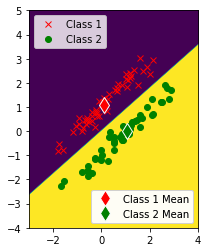

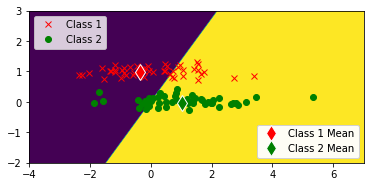

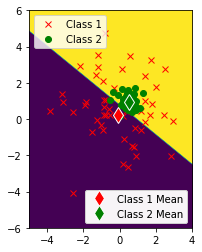

In [48]:
#Get test data for  test-1
X_test1=np_array4[:,0:2]
y_test1=np_array4[:,2]

#Calculate the means for  test-1
mean_test_1=find_mean(X_test1,y_test1)
# err1,p1,p2=error_train(np_array1)
# print(err1)
plotDecBoundaries(X_test1,y_test1,mean_train_1)

#Get test data for  test-2
X_test2=np_array5[:,0:2]
y_test2=np_array5[:,2]

#Calculate the means for  test-2
mean_test_2=find_mean(X_test2,y_test2)
plotDecBoundaries(X_test2,y_test2,mean_train_2)

#Get test data for  test-3
X_test3=np_array6[:,0:2]
y_test3=np_array6[:,2]

#Calculate the means for  test-3
mean_test_3=find_mean(X_test3,y_test3)
plotDecBoundaries(X_test3,y_test3,mean_train_3)


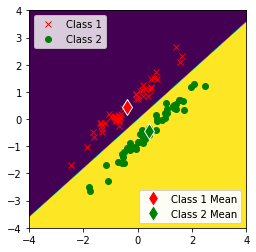

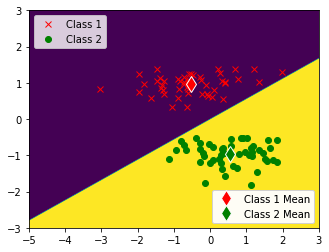

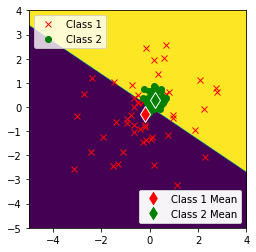

(100, 2)


In [49]:
dstd1,p1=data_standardized(X_train1)
dstd2,p2=data_standardized(X_train2)
dstd3,p3=data_standardized(X_train3)
#Calculate the means for dataset-1
mean_std_1=find_mean(dstd1,y_train1)
plotDecBoundaries(dstd1,y_train1,mean_std_1)

#Calculate the means for dataset-2
mean_std_2=find_mean(dstd2,y_train2)
plotDecBoundaries(dstd2,y_train2,mean_std_2)

#Calculate the means for dataset-3
mean_std_3=find_mean(dstd3,y_train3)
plotDecBoundaries(dstd3,y_train3,mean_std_3)

print(dstd1.shape)
    

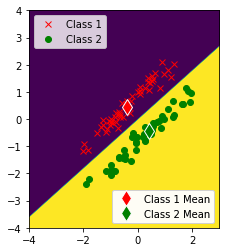

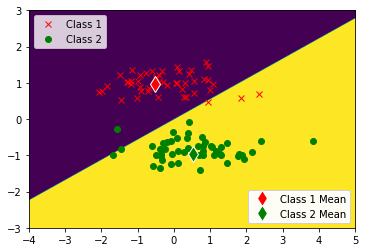

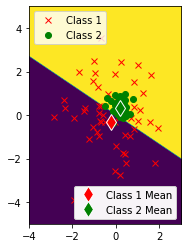

In [50]:
# def data_standardized_test(z,p):
    
#     return (z-p[0])/p[1]

dtstd1=data_standardized_test(X_test1,p1)
dtstd2=data_standardized_test(X_test2,p2)
dtstd3=data_standardized_test(X_test3,p3)

#Calculate the means for dataset-1
plotDecBoundaries(dtstd1,y_test1,mean_std_1)

#Calculate the means for dataset-2
plotDecBoundaries(dtstd2,y_test2,mean_std_2)

#Calculate the means for dataset-3
plotDecBoundaries(dtstd3,y_test3,mean_std_3)

In [51]:
err1,p1,p2=error_train(np_array1)
err2,p3,p4=error_train(np_array2)
err3,p5,p6=error_train(np_array3)
print(err1)
print(err2)
print(err3)



0.0
17.0
23.0


In [52]:
errt1=error_test(np_array4,p1,p2)
errt2=error_test(np_array5,p3,p4)
errt3=error_test(np_array6,p5,p6)

print(errt1)
print(errt2)
print(errt3)


0.0
26.0
23.0


In [53]:
# err_noraml_train1=error_std_1(dstd1)
# print(dstd1.shape)
# err_noraml_train2=error_std_1(dstd2)
# err_noraml_train3=error_std_1(dstd3)
# print(err_noraml_train1)
# print(err_noraml_train2)
# print(err_noraml_train3)




In [54]:
#Part E

#Feature Reduction 
def feature_reduction(V,rm):
    V_vector=[]
    for r in rm:
        r=np.array(r)
        r_nm=r/np.linalg.norm(r)
        P=np.dot(V,r_nm)
        V_vector.append(P)
    return np.array(V_vector)
#Creating the rm vector

rm=[[10,m] 
    if m<10 
    else [20-m,10] 
    if m>=10 and m<30
    else [-10,40-m] 
    for m in range(40)]
rm=np.array(rm)

sl1=dstd1[:,:2]
sl2=dstd2[:,:2]
sl3=dstd3[:,:2]



#Find the projected P's in each training normalized datasets

VProjection1= feature_reduction(dstd1,rm)
VProjection2= feature_reduction(dstd2,rm)
VProjection3= feature_reduction(dstd3,rm)


In [ ]:
def find_error(X,Y,mean):
    y_pred=[]
    for p,q in X:
        y_pred.append(1.0) if (((p-mean[0][0])**2)+((q-mean[0][1])**2))**0.5<(((p-mean[1][0])**2)+((q-mean[1][1])**2))**0.5 else y_pred.append(2.0)
    
    err_vals=len(list(filter(lambda y1,y2: y1!=y2),y_pred,Y))
    err_rate=
        
    

In [55]:
err_train1=[]
err_train2=[]
err_train3=[]



def er_4(var1):
 c1=var1[np.where(var1[:,1]==1.0)]
 c2=var1[np.where(var1[:,1]==2.0)]
 c1_1=np.delete(c1,1,1)
 c2_2=np.delete(c2,1,1)
 mu1 = np.mean(c1_1, axis=0)
 mu2 = np.mean(c2_2, axis=0)
 w_nm = np.ones(3)
 w_nm[0] = 0.5 * (np.dot(mu2, mu2) - np.dot(mu1, mu1))
 w_nm[1:] = mu1 - mu2
 w=np.zeros(3)
 for i,w in enumerate([w_nm]):
        g1 = c1 @ w[1:] + w[0] ## discriminate function values for all data in class 1
        g2 = c2 @ w[1:] + w[0] ## discriminate function values for all data in class 2
        N1_errors = np.sum(g1 < 0)  ## error condition:  g > 0 <==> x in Gamma_1
        N2_errors = np.sum(g2 >= 0) ## error condition:  g <= 0 <==> x in Gamma_2
        error_rate = (N1_errors + N2_errors) / 100
 return (error_rate*100)

for x1,x2,x3 in zip(VProjection1,VProjection2,VProjection3):
    var1=np.column_stack((x1,sl1))
    var2=np.column_stack((x2,sl2))
    var3=np.column_stack((x3,sl3))
    err_train1.append(er_4(var1))
    err_train2.append(er_4(var2))
    err_train3.append(er_4(var3))


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 3)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Text(0.5, 1.0, 'Train 1 dataset')

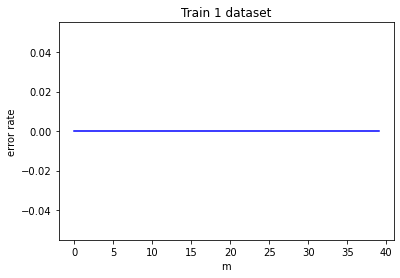

In [ ]:
print(err_train3)
plt.plot(err_train1,color='blue')
plt.xlabel('m')
plt.ylabel('error rate')
plt.title('Train 1 dataset')